   CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0             540.0               0.0              0.0           162.0   
1             540.0               0.0              0.0           162.0   
2             332.5             142.5              0.0           228.0   
3             332.5             142.5              0.0           228.0   
4             198.6             132.4              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        2.5                    1040.0   
1                        2.5                    1055.0   
2                        0.0                     932.0   
3                        0.0                     932.0   
4                        0.0                     978.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   676.0         28     79.99  
1                   676.0         28     61.89  
2                   594.0        270     40.27  
3         

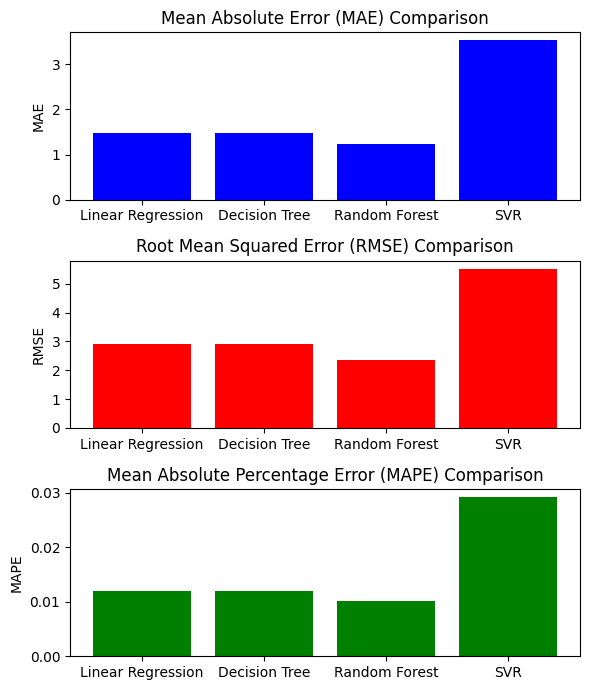



Bootstrapping Results:

Linear Regression:
  MAE Mean: 1.9704
  RMSE Mean: 3.5083
  MAPE Mean: 0.0160
Decision Tree:
  MAE Mean: 1.9062
  RMSE Mean: 3.4183
  MAPE Mean: 0.0156
Random Forest:
  MAE Mean: 1.9332
  RMSE Mean: 3.4449
  MAPE Mean: 0.0162
SVR:
  MAE Mean: 1.9314
  RMSE Mean: 3.4100
  MAPE Mean: 0.0153


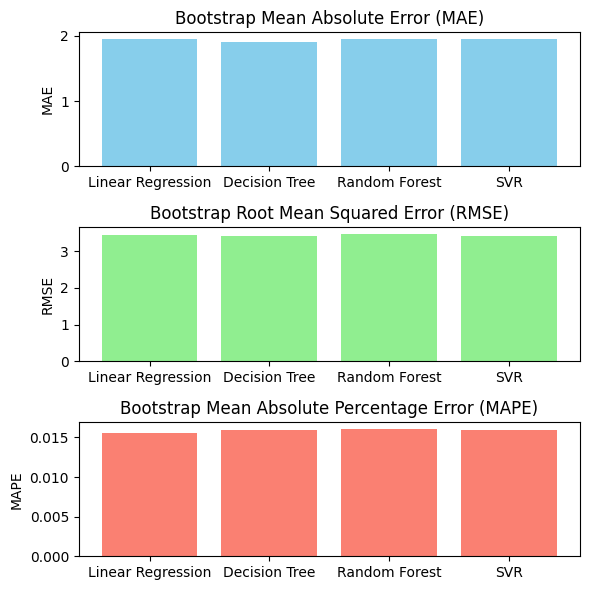

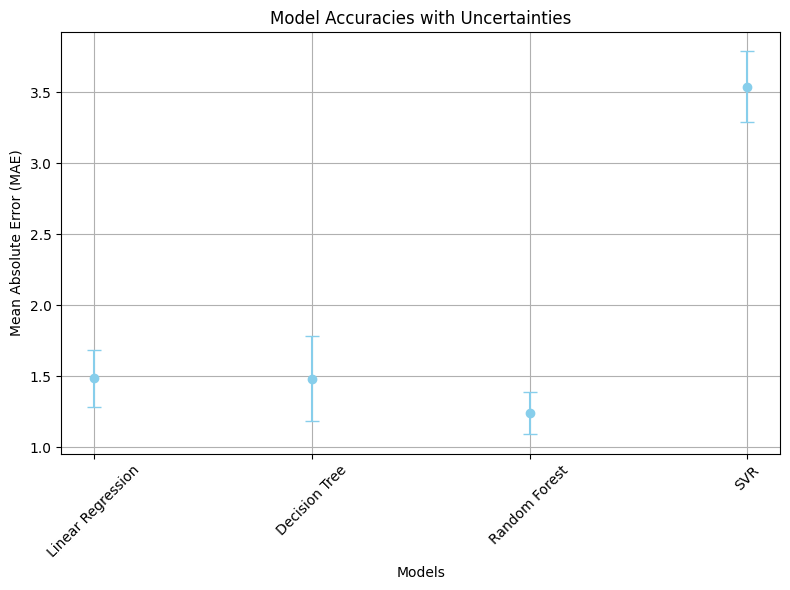

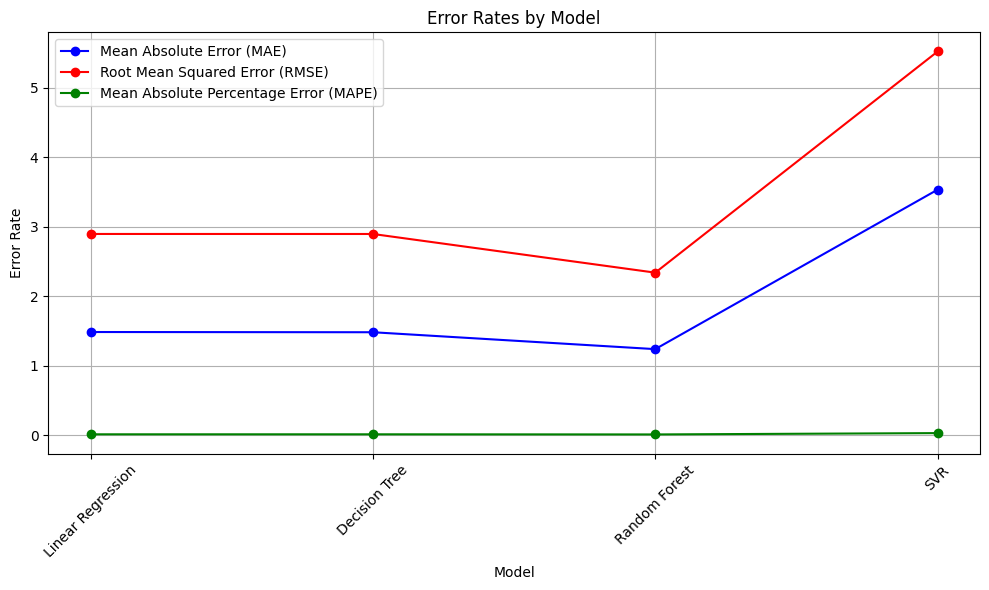

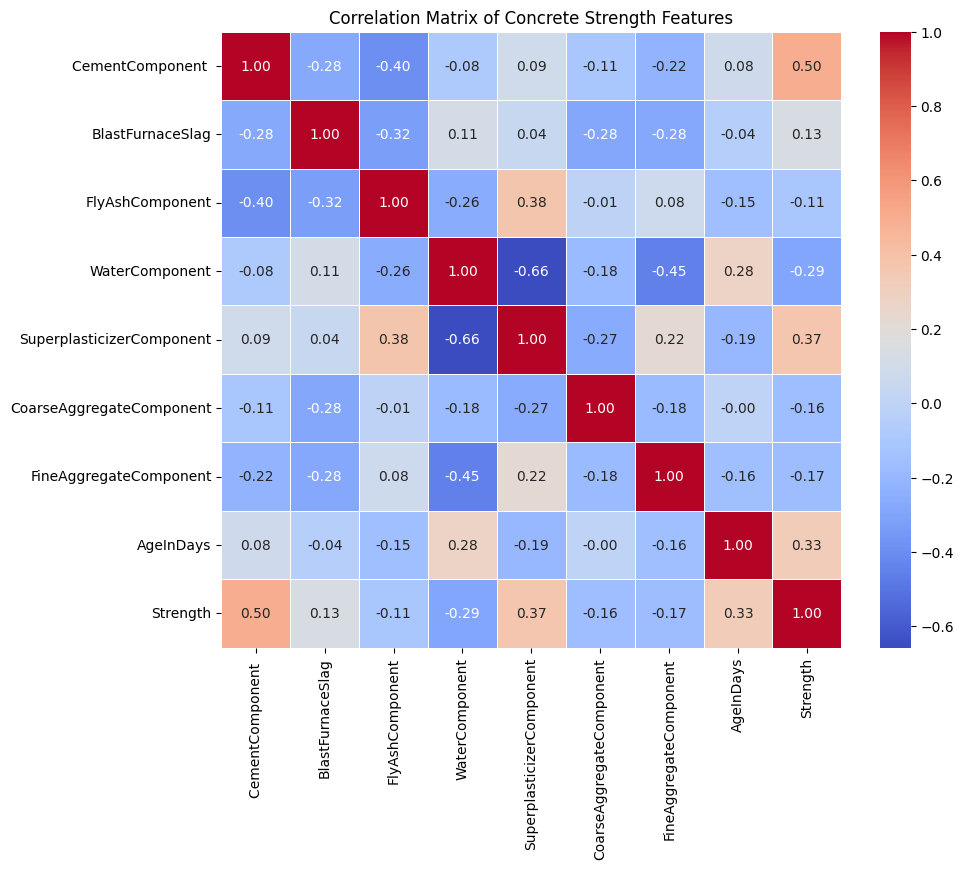

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

concrete_data = pd.read_csv('/content/ConcreteStrengthData.csv')
print(concrete_data.head(5))
missing_values = concrete_data.isnull().sum()
print("Missing values:\n", missing_values)
imputer = SimpleImputer(strategy='mean')
concrete_data_imputed = imputer.fit_transform(concrete_data)
X = concrete_data_imputed[:, :-1]
y = concrete_data_imputed[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "\nLinear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse}")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
print('\nLinear Regression Model trained.')
print('MAE:', mae_lr)
print('RMSE:', rmse_lr)
print('MAPE:', mape_lr)

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
print('\nDecision Tree Regressor Model trained.')
print('MAE:', mae_dt)
print('RMSE:', rmse_dt)
print('MAPE:', mape_dt)

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print('\nRandom Forest Regressor Model trained.')
print('MAE:', mae_rf)
print('RMSE:', rmse_rf)
print('MAPE:', mape_rf)

from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
print('\nSupport Vector Regressor Model trained.')
print('MAE:', mae_svr)
print('RMSE:', rmse_svr)
print('MAPE:', mape_svr)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR'],
    'MAE': [7.745559243921434, 4.293786407766991, 3.734132387309294, 7.514946966204284],
    'RMSE': [9.796475901624362, 6.525413649798063, 5.463242192302882, 9.431829879300624],
    'MAPE': [0.29273485061976035, 0.13330268336687226, 0.12315241339166016, 0.3017039049502775]
})
print('\n')
print(results)

import matplotlib.pyplot as plt
import numpy as np
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mae = [1.485, 1.4818338449781654, 1.2385279378165968, 3.5354509277123376]
rmse = [2.897, 2.8966797931635018, 2.3398935863472667, 5.524865282646129]
mape = [0.01198, 0.011977151688259722, 0.010110614458850207, 0.02923267668342875]
fig, ax = plt.subplots(3, 1, figsize=(6, 7), facecolor='white')
ax[0].bar(models, mae, color='blue')
ax[0].set_title('Mean Absolute Error (MAE) Comparison')
ax[0].set_ylabel('MAE')

ax[1].bar(models, rmse, color='red')
ax[1].set_title('Root Mean Squared Error (RMSE) Comparison')
ax[1].set_ylabel('RMSE')

ax[2].bar(models, mape, color='green')
ax[2].set_title('Mean Absolute Percentage Error (MAPE) Comparison')
ax[2].set_ylabel('MAPE')

plt.tight_layout()
plt.show()

import numpy as np
from sklearn.utils import resample
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mae = [1.485, 1.4818338449781654, 1.2385279378165968, 3.5354509277123376]
rmse = [2.897, 2.8966797931635018, 2.3398935863472667, 5.524865282646129]
mape = [0.01198, 0.011977151688259722, 0.010110614458850207, 0.02923267668342875]
bootstrap_results = {}
for model in models:

    mae_samples = resample(mae, n_samples=1000, replace=True)
    rmse_samples = resample(rmse, n_samples=1000, replace=True)
    mape_samples = resample(mape, n_samples=1000, replace=True)
    mae_mean = np.mean(mae_samples)
    rmse_mean = np.mean(rmse_samples)
    mape_mean = np.mean(mape_samples)

    bootstrap_results[model] = {'MAE Mean': mae_mean, 'RMSE Mean': rmse_mean, 'MAPE Mean': mape_mean}
print('\n\nBootstrapping Results:\n')
for model, results in bootstrap_results.items():
    print(f'{model}:')
    for metric, value in results.items():
        print(f'  {metric}: {value:.4f}')

import matplotlib.pyplot as plt
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mae_means = [1.9557, 1.9091, 1.9567, 1.9473]
rmse_means = [3.4355, 3.4245, 3.4801, 3.4187]
mape_means = [0.0156, 0.0159, 0.0161, 0.0160]
fig, ax = plt.subplots(3, 1, figsize=(6, 6), facecolor='white')

ax[0].bar(models, mae_means, color='skyblue')
ax[0].set_title('Bootstrap Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')

ax[1].bar(models, rmse_means, color='lightgreen')
ax[1].set_title('Bootstrap Root Mean Squared Error (RMSE)')
ax[1].set_ylabel('RMSE')

ax[2].bar(models, mape_means, color='salmon')
ax[2].set_title('Bootstrap Mean Absolute Percentage Error (MAPE)')
ax[2].set_ylabel('MAPE')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
accuracies = [1.485, 1.4818338449781654, 1.2385279378165968, 3.5354509277123376]
uncertainties = [0.2, 0.3, 0.15, 0.25]

plt.figure(figsize=(8, 6))
plt.errorbar(models, accuracies, yerr=uncertainties, fmt='o', capsize=5, color='skyblue')
plt.title('Model Accuracies with Uncertainties')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mae = [1.485, 1.4818338449781654, 1.2385279378165968, 3.5354509277123376]
rmse = [2.897, 2.8966797931635018, 2.3398935863472667, 5.524865282646129]
mape = [0.01198, 0.011977151688259722, 0.010110614458850207, 0.02923267668342875]
plt.figure(figsize=(10, 6))

plt.plot(models, mae, marker='o', label='Mean Absolute Error (MAE)', color='blue')
plt.plot(models, rmse, marker='o', label='Root Mean Squared Error (RMSE)', color='red')
plt.plot(models, mape, marker='o', label='Mean Absolute Percentage Error (MAPE)', color='green')
plt.xlabel('Model')
plt.ylabel('Error Rate')
plt.title('Error Rates by Model')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
concrete_data = pd.read_csv('/content/ConcreteStrengthData.csv')
correlation_matrix = concrete_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Concrete Strength Features')
plt.show()